In [2]:
!pip install -Uqq fastai

In [3]:
from fastai.vision.all import *

Data set to be downloaded and decompressed with this line of code:

In [13]:
path = untar_data(URLs.PETS)

We can check whats inside with .ls() method.

In [6]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

get_image_files is a fastai function that helps us grab all the image files recursively in one folder.

In [7]:
files = get_image_files(path/"images")
len(files)

7390

To label our data for the cats vs dogs problem, we need to know which filenames are of dogs pictures and which ones of cat pictures.

In [8]:
files[0],files[6]

(Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_115.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_128.jpg'))

We can then define an easy label function:

In [9]:
def label_func(f): return f[0].isupper()

To get our data ready for a model we need to bring in a data loader object.

In [10]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

We can check if everything looks okay with the show_batch method

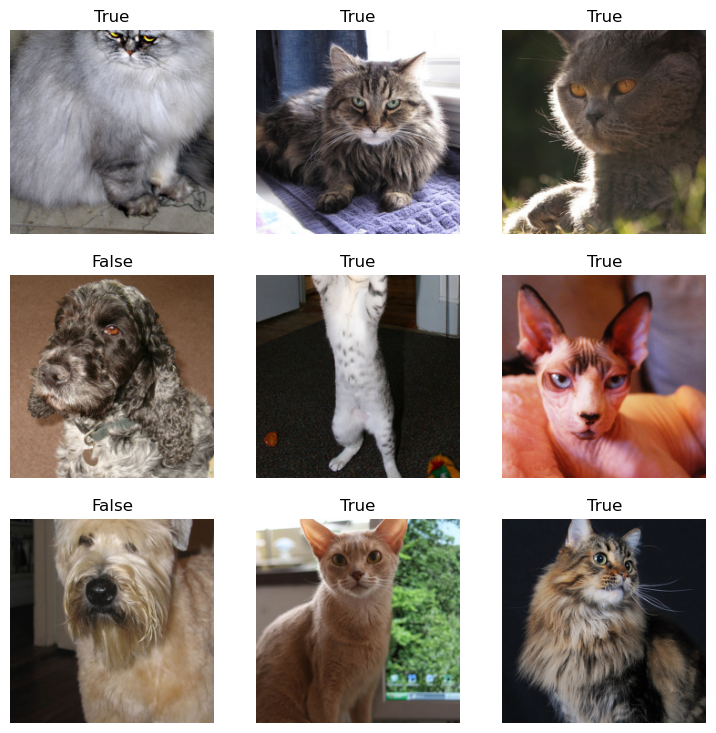

In [11]:
dls.show_batch()

Then we can create a learner, which is a fastai object that combines the data and a model for training, and uses transfer learning to fine tune a pretrained model in just two lines of code:

In [12]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 146MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,0.155141,0.024835,0.008119,24:46


epoch,train_loss,valid_loss,error_rate,time
0,0.075884,0.012226,0.004060,37:00


The first line downloaded a model called ResNet34, pretrained on ImageNet, and adapted it to our specific problem. It then finetuned that model and in a relatively short time, we get a model with an error reate of well under 1%... amazing!

If you want to make a prediction on a new image, you can use learn.predict:

In [14]:
learn.predict(files[0])

('False', tensor(0), tensor([1.0000e+00, 1.7406e-06]))

We can look at some predictions with the show results method:

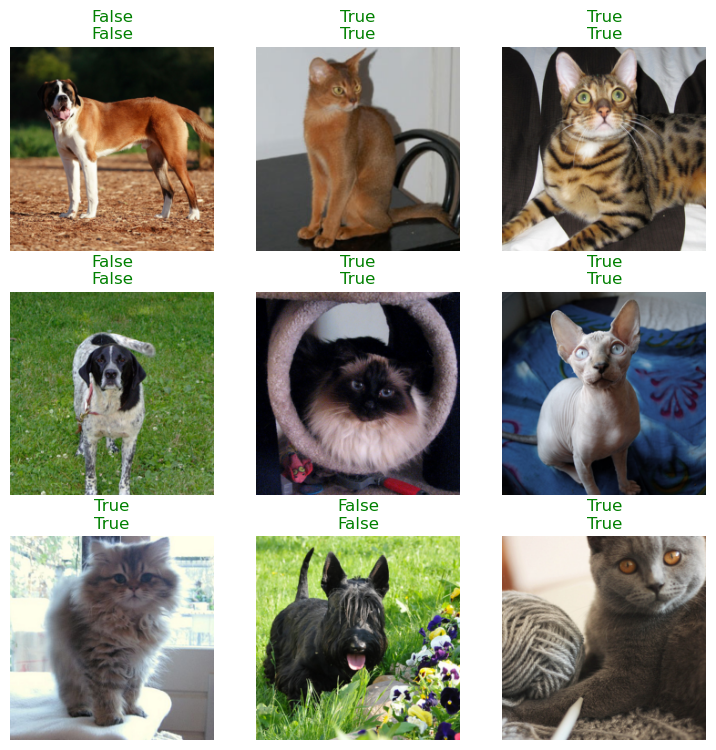

In [15]:
learn.show_results()